In [65]:
from bs4 import BeautifulSoup as BS
import requests as req
import datetime
import pandas as pd
import numpy as np

start_year = 1990
end_year = datetime.date.today().year

#end year does not include in the range
years = [str(yr) for yr in range(start_year, end_year+1)]
print(f'This script is to scrap US Treasury Rate data from {start_year} to {end_year}.')

This script is to scrap US Treasury Rate data from 1990 to 2025.


In [31]:
urls=[]
url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=xxxx"

for year in years:
    urls.append(url.replace('xxxx', year))

# use the first URL to inspect the table structure, and get the table headings
html_text = req.get(urls[0]).text
soup=BS(html_text, 'html.parser')

print('Scrapping from website:', soup.title.text)

Scrapping from website: Resource Center | U.S. Department of the Treasury


In [ ]:
# column headings
headings = []
# table = soup.find('table', class_ = 'usa-table views-table views-view-table cols-26') 
# table_rows = table.find_all('tr')

for item in soup.find_all('th'):
    headings.append(item.text)
print('Table headings <th>:', headings)

Table headings <th>: ['Date', '20 YR', '30 YR', 'Extrapolation Factor', '6 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '17 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT', ' COUPON EQUIVALENT', '1 Mo', '1.5 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']


In [41]:
# now scrap all the table data/ td from all the URLs
all_rows = []
for url in urls:
    html_text = req.get(url).text
    soup = BS(html_text, 'html.parser')
    table_rows = soup.find_all('tr')               
    for tr in table_rows[1:]:
        td = tr.find_all('td')
        row=[i.text.strip('\n') for i in td]       #i is each td element, i.text is to find all text in that i, .strip to remove entries starts with \n
        all_rows.append(row)
df=pd.DataFrame(data=all_rows, columns=headings)

In [51]:
print(df.info())
df.to_csv('raw_US_Treasury_Rates.csv', index=False)
# data cleaning, data fill with N/A, convert N/A to NaN, convert str to float
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    8938 non-null   object
 1   20 YR                   8938 non-null   object
 2   30 YR                   8938 non-null   object
 3   Extrapolation Factor    8938 non-null   object
 4   6 WEEKS BANK DISCOUNT   8938 non-null   object
 5   COUPON EQUIVALENT       8938 non-null   object
 6   8 WEEKS BANK DISCOUNT   8938 non-null   object
 7   COUPON EQUIVALENT       8938 non-null   object
 8   17 WEEKS BANK DISCOUNT  8938 non-null   object
 9   COUPON EQUIVALENT       8938 non-null   object
 10  52 WEEKS BANK DISCOUNT  8938 non-null   object
 11   COUPON EQUIVALENT      8938 non-null   object
 12  1 Mo                    8938 non-null   object
 13  1.5 Mo                  8938 non-null   object
 14  2 Mo                    8938 non-null   object
 15  3 Mo

,Date,20 YR,30 YR,Extrapolation Factor,6 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.89,7.81,7.87,7.90,7.87,7.98,7.94,N/A,8.00
1,01/03/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.94,7.85,7.94,7.96,7.92,8.04,7.99,N/A,8.04
2,01/04/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.90,7.82,7.92,7.93,7.91,8.02,7.98,N/A,8.04
3,01/05/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.85,7.79,7.90,7.94,7.92,8.03,7.99,N/A,8.06
4,01/08/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.88,7.81,7.90,7.95,7.92,8.05,8.02,N/A,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,09/16/2025,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,4.00,3.81,3.62,3.51,3.47,3.59,3.78,4.04,4.61,4.65
8934,09/17/2025,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,3.97,3.80,3.60,3.52,3.51,3.62,3.81,4.06,4.62,4.66
8935,09/18/2025,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,3.98,3.81,3.61,3.57,3.55,3.67,3.86,4.11,4.68,4.72
8936,09/19/2025,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,3.98,3.81,3.60,3.57,3.56,3.68,3.88,4.14,4.71,4.75


In [100]:
# noticed there are space in N/A cell, 
print("N/A cell: '", df['20 YR'][0], "'")
# remove all blank spaces in the dataframe, except headers
clean_df = df.iloc[:,:].map(lambda x:x.strip())
# converting to lower case, if cell equals to 'n/a', then replace with empty string
clean_df = clean_df.map(lambda x:np.nan if (x.lower() == 'n/a' or x =='') else x)
clean_df

N/A cell: ' N/A           '


,Date,20 YR,30 YR,Extrapolation Factor,6 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,01/03/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,01/04/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,01/05/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,01/08/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,09/16/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.00,3.81,3.62,3.51,3.47,3.59,3.78,4.04,4.61,4.65
8934,09/17/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.97,3.80,3.60,3.52,3.51,3.62,3.81,4.06,4.62,4.66
8935,09/18/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.98,3.81,3.61,3.57,3.55,3.67,3.86,4.11,4.68,4.72
8936,09/19/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.98,3.81,3.60,3.57,3.56,3.68,3.88,4.14,4.71,4.75


In [107]:
# dropping all columns with all NaN values
clean_df.dropna(axis=1, how='all', inplace=True)
# change Date column to datetime and the rest to float
clean_df[clean_df.columns[0]] = pd.to_datetime(clean_df[clean_df.columns[0]])
for col in clean_df.columns[1:]:
    clean_df[col] = clean_df[col].astype(str).astype(float)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8938 non-null   datetime64[ns]
 1   1 Mo    6038 non-null   float64       
 2   1.5 Mo  150 non-null    float64       
 3   2 Mo    1733 non-null   float64       
 4   3 Mo    8934 non-null   float64       
 5   4 Mo    731 non-null    float64       
 6   6 Mo    8937 non-null   float64       
 7   1 Yr    8937 non-null   float64       
 8   2 Yr    8937 non-null   float64       
 9   3 Yr    8937 non-null   float64       
 10  5 Yr    8937 non-null   float64       
 11  7 Yr    8937 non-null   float64       
 12  10 Yr   8937 non-null   float64       
 13  20 Yr   7998 non-null   float64       
 14  30 Yr   7943 non-null   float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 1.0 MB


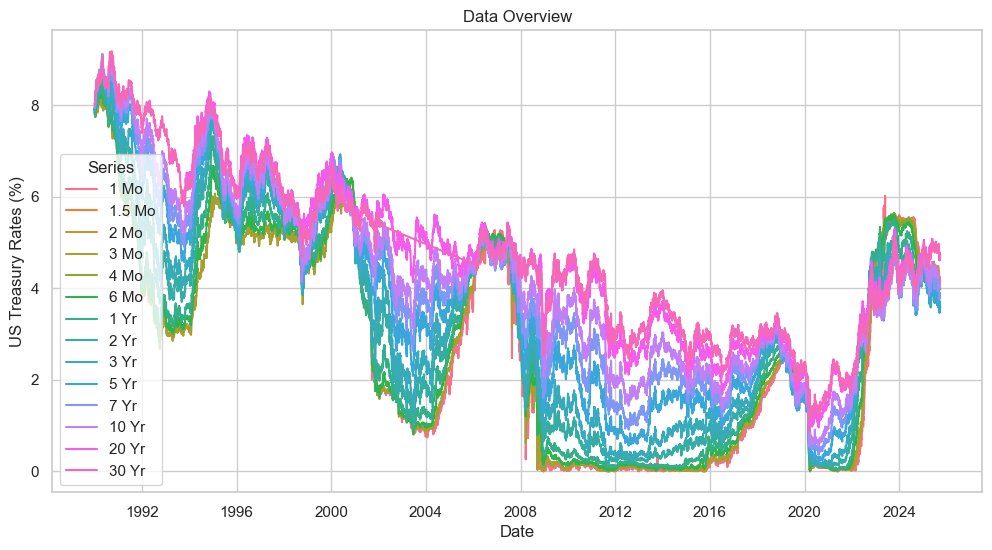

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# Melt df to long format
data = clean_df.melt(id_vars='Date', var_name='Series', value_name='Value')
data.dropna(inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Value', hue='Series')
plt.title("Data Overview")
plt.ylabel("US Treasury Rates (%)")
# plt.
plt.show()

[Text(0, 0.5, '')]

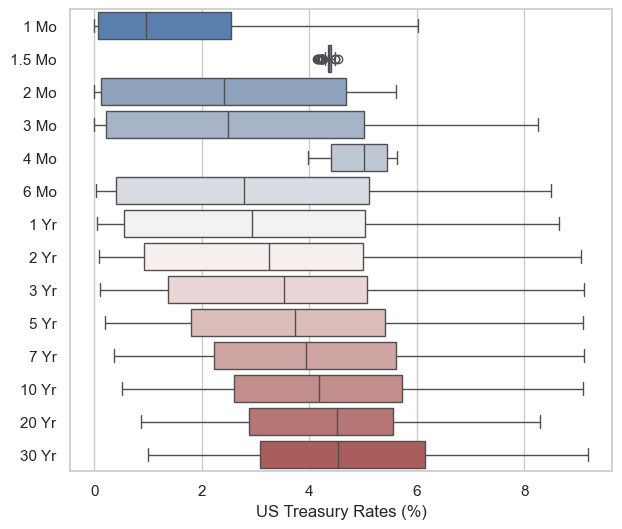

In [133]:
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes, vlag - blue/pink diverging color palette
sns.boxplot(
    data, x="Value", y="Series", hue="Series", palette="vlag"
)
# sns.stripplot(data, x="Value", y="Series", size=1, color=".3")

ax.set_xlabel("US Treasury Rates (%)")
ax.xaxis.grid(True)
ax.set(ylabel="")